# Introduction to Machine Learning and Data Science: Exploratory Data Analysis (EDA) with Diabetes Dataset

This notebook contains exercises for an introductory course on Machine Learning and Data Science, focusing on Exploratory Data Analysis (EDA) using the Pima Indians Diabetes dataset.

We will cover essential steps in understanding, cleaning, transforming, and analyzing the data using pandas and matplotlib/seaborn. The exercises are divided into basic, intermediate, and advanced levels.

**Estimated Time:** 2 Hours

## Setup

First, we need to import the necessary libraries and load the dataset. The dataset does not come with headers, so we will define the column names based on common practice for this dataset:

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (0 for no diabetes, 1 for diabetes)

In [2]:
!pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL for the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
diabetes_df = pd.read_csv(url, names=names)

# Display the first few rows to confirm loading
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Basic Exercises (Approx. 45-60 minutes)

These exercises focus on fundamental data exploration and manipulation using pandas and basic visualization.

### Exercise 1: Initial Data Inspection

1. Display the last 7 rows of the `diabetes_df` DataFrame.
2. Get a concise summary of the DataFrame using `.info()`. How many entries are there? What are the data types?
3. Generate a statistical summary of the numerical attributes using `.describe()`. Pay attention to the minimum values for columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`. Do you notice anything unusual?
4. Examine the unique values and their counts for the `Outcome` column using `.value_counts()`. Is the dataset balanced in terms of the outcome variable?

In [4]:
# Your code for Exercise 1.1

diabetes_df.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Your code for Exercise 1.2
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Your code for Exercise 1.3
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are some unusual zeros such that zero blood pressure, glucose, skin thickness and insulin. Also, there is an enormous maximum of insulin.

In [7]:
# Your code for Exercise 1.4
diabetes_df.value_counts("Outcome")

Outcome
0    500
1    268
Name: count, dtype: int64

The dataset is not balanced. There are way more healthy people than people with diabetes (yay!).

### Exercise 2: Basic Data Filtering and Selection

1. Select and display only the `Age` and `BMI` columns for the first 10 patients.
2. Filter the DataFrame to show only the patients who tested positive for diabetes (`Outcome` is 1).
3. Calculate the average `Glucose` level for patients who tested negative for diabetes (`Outcome` is 0).

In [9]:
# Your code for Exercise 2.1
diabetes_df.loc[:2, ['Age', 'BMI']]


,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3


In [11]:
# Your code for Exercise 2.2
diabetes_df[diabetes_df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [15]:
# Your code for Exercise 2.3
diabetes_df[diabetes_df['Outcome']==0].mean()["Glucose"]

np.float64(109.98)

### Exercise 3: Simple Visualization

1. Create a histogram for the `Age` column to visualize the age distribution of patients.
2. Generate a histogram for the `BMI` column.
3. Use seaborn's `countplot` to visualize the distribution of the `Outcome` variable (number of diabetic vs non-diabetic patients).

<Axes: >

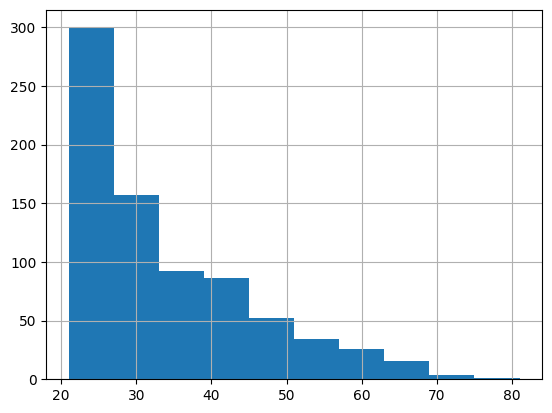

In [18]:
# Your code for Exercise 3.1
diabetes_df['Age'].hist()

<Axes: >

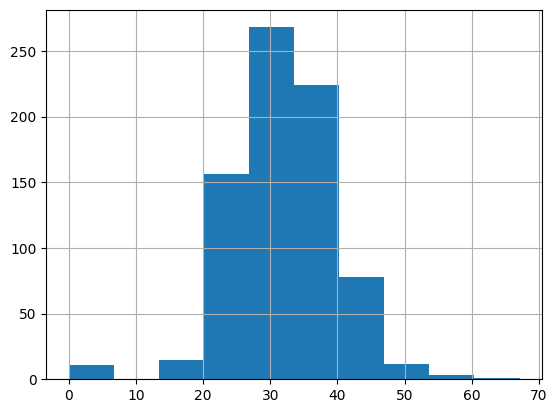

In [19]:
# Your code for Exercise 3.2
diabetes_df['BMI'].hist()

<Axes: >

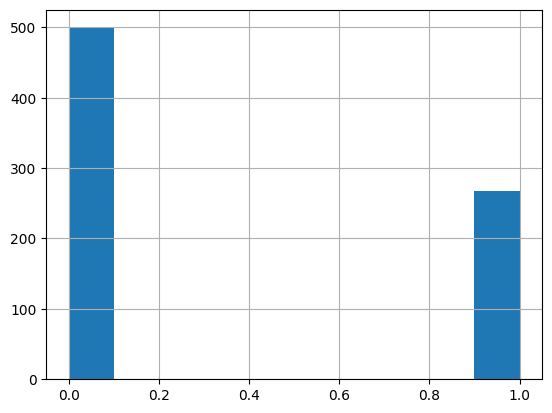

In [29]:
diabetes_df['Outcome'].hist()

<Axes: xlabel='Outcome', ylabel='count'>

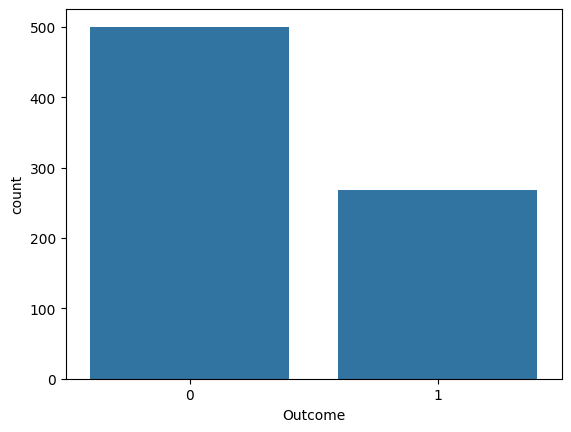

In [32]:
# Your code for Exercise 3.3
sns.countplot(diabetes_df, x='Outcome')

## Intermediate Exercises (Approx. 45-60 minutes)

These exercises delve into data cleaning, manipulation, and basic feature engineering.

### Exercise 4: Handling Missing Data (Implicit Missing Values)

As observed in Exercise 1.3, some columns have a minimum value of 0, which might represent missing data (e.g., a blood pressure of 0 is biologically impossible).

1. For the `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns, replace the 0 values with `NaN` (Not a Number) to explicitly mark them as missing.
2. Verify the number of missing values in these columns after the replacement using `.info()` or `.isnull().sum()`. Which column has the most missing values now?
3. Choose an imputation strategy for the missing numerical values (e.g., replace with the mean or median of the respective column). Justify your choice.
4. Apply the chosen imputation strategy to fill the `NaN` values in the affected columns. Verify that there are no more missing values in these columns.

In [35]:
# Your code for Exercise 4.1
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [37]:
# Your code for Exercise 4.2
diabetes_df.info()
diabetes_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Insulin has the most missing values.

In [38]:
# Your code for Exercise 4.3 (Add comments for justification)
# The mean is used to fill missing values for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns. We use the mean because it is a common practice to fill missing values with the average of the column, especially when the data is normally distributed. This helps to maintain the overall distribution of the data while filling in gaps.
mean_values = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean()

In [40]:
# Your code for Exercise 4.4
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(mean_values)
diabetes_df.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


### Exercise 5: Creating New Features (Feature Engineering)

Create a new categorical feature based on the `Age` column.

1. Define age bins (e.g., '0-20', '21-30', '31-40', '41-50', '51+').
2. Create a new column called `AgeGroup` by categorizing the `Age` values into these bins.
3. Display the value counts for the new `AgeGroup` column.

In [43]:
# Your code for Exercise 5.1, 5.2, and 5.3
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51+']

diabetes_df['AgeGroup'] = pd.cut(diabetes_df['Age'], bins=bins, labels=labels, right=False)

print(diabetes_df['AgeGroup'].value_counts())


AgeGroup
21-30    396
31-40    165
41-50    118
51+       89
0-20       0
Name: count, dtype: int64


### Exercise 6: Exploring Correlations

1. Compute the correlation matrix for the numerical features in the DataFrame using `.corr()`.
2. Display the correlations of all numerical features with the `Outcome` variable, sorted in descending order. Which features have the strongest positive and negative correlations with diabetes outcome?
3. Use seaborn's `heatmap` to visualize the correlation matrix. Interpret the relationships between different features.

In [45]:
# Your code for Exercise 6.1
diabetes_df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [ ]:
# Your code for Exercise 6.2
diabetes_df.corr(numeric_only=True)['Outcome'].sort_values(ascending=False)
# highest correlation with Outcome is 'Glucose' and lowest is 'Pregnancies'

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

<Axes: >

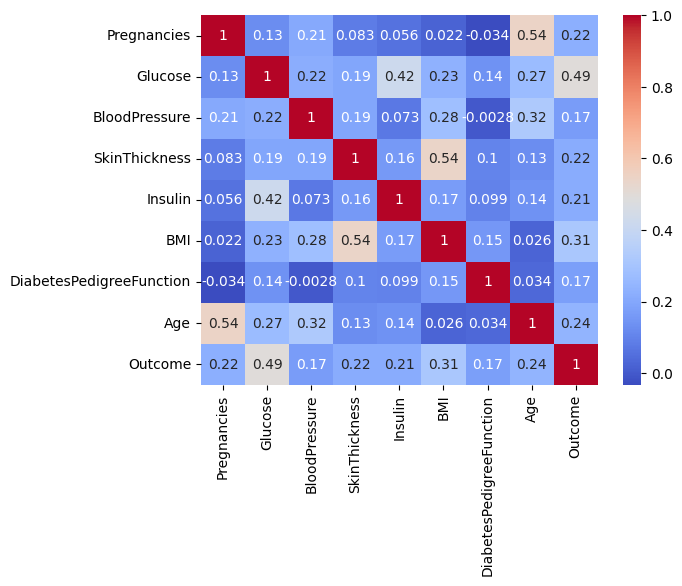

In [48]:
# Your code for Exercise 6.3
sns.heatmap(diabetes_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Advanced Exercises (Approx. 30-45 minutes, potentially carrying over into self-study)

These exercises challenge students with more complex data transformations and analysis.

### Exercise 7: Analyzing Relationships with Outcome

Use visualizations to explore the relationship between different features and the `Outcome` (diabetes positive or negative).

1. Create a violin plot using seaborn to visualize the distribution of `Age` for both `Outcome` groups (0 and 1).
2. Create a scatter plot of `Glucose` vs `BMI`, coloring the points based on the `Outcome` variable.
3. Use seaborn's `boxplot` to compare the distribution of `BloodPressure` across different `AgeGroup` categories (created in Exercise 5).

<Axes: xlabel='Age'>

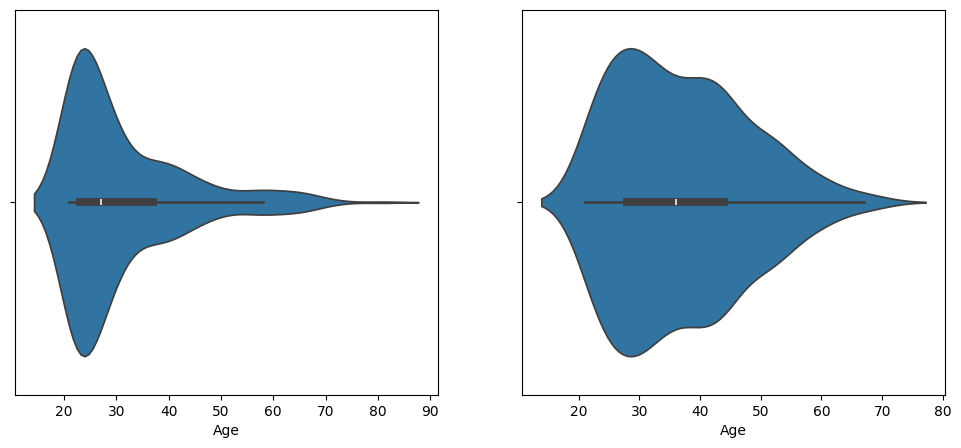

In [62]:
# Your code for Exercise 7.1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.violinplot(x='Age', data=diabetes_df[diabetes_df['Outcome']==0], ax=axes[0])
sns.violinplot(x='Age', data=diabetes_df[diabetes_df['Outcome']==1], ax=axes[1])

<Axes: xlabel='BMI', ylabel='Glucose'>

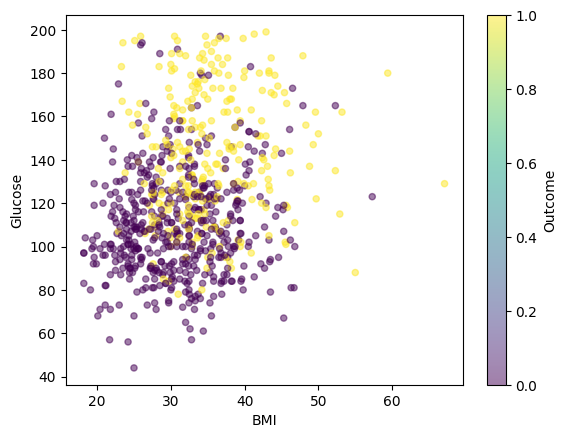

In [63]:
# Your code for Exercise 7.2
diabetes_df.plot(kind='scatter', x='BMI', y='Glucose', alpha=0.5, c='Outcome', colormap='viridis')

<Axes: xlabel='AgeGroup', ylabel='BloodPressure'>

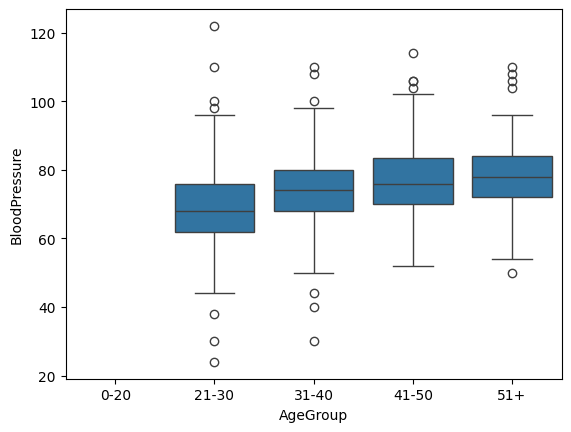

In [66]:
# Your code for Exercise 7.3
sns.boxplot(x='AgeGroup', y='BloodPressure', data=diabetes_df)

### Exercise 8: Outlier Identification (Visualization Based)

Use box plots to visually identify potential outliers in some of the key numerical features.

1. Create box plots for `Glucose`, `BloodPressure`, `Insulin`, and `BMI`.
2. Discuss what outliers might represent in this medical dataset and how they could potentially affect machine learning models.

<Axes: xlabel='AgeGroup', ylabel='BMI'>

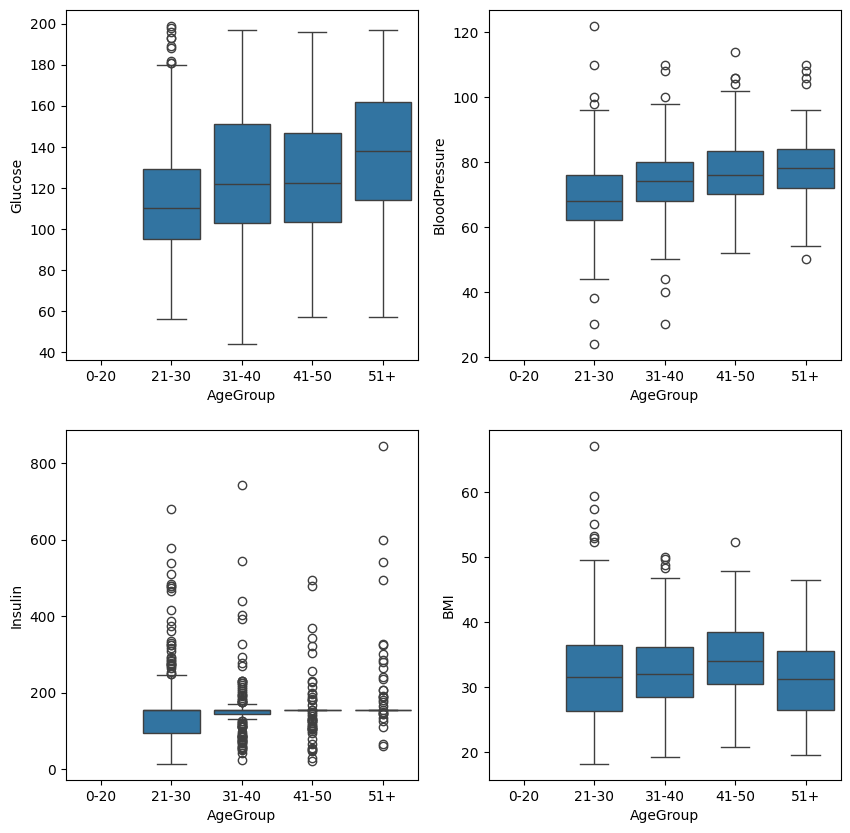

In [75]:
# Your code for Exercise 8.1
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='AgeGroup', y='Glucose', data=diabetes_df, ax=axes[0, 0])
sns.boxplot(x='AgeGroup', y='BloodPressure', data=diabetes_df, ax=axes[0, 1])
sns.boxplot(x='AgeGroup', y='Insulin', data=diabetes_df, ax=axes[1, 0])
sns.boxplot(x='AgeGroup', y='BMI', data=diabetes_df, ax=axes[1, 1])

For instance, there is a very narrow range of insuline that most people have, but there are a lot of other peope that are outside of this range. This might because these people have diabetes and thus the Machine Learning model must be aware of that. Besides, the ranges of glucose are more or less the same for all age groups, but there are less young people with high glucose levels.

In general, there are some outliers; single points, in all plots. These points might be specific cases that might require specific medical attention and we ight want our model to override them.

### Exercise 9: (Optional Stretch) Further Feature Engineering or Analysis

Choose one of the following (or come up with your own idea):

1. Create a new feature that combines `BMI` and `Age` based on common health knowledge (e.g., BMI categories for different age groups).
2. Investigate the distribution of `DiabetesPedigreeFunction` and its relationship with the `Outcome`.

In [ ]:
# Your code or notes for Exercise 9
